## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [4]:
import numpy as np
import math 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
# plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

#### *ii. Load Dataset*

In [5]:
tree = pd.read_csv("treetypes.csv")
df=tree

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [6]:
df.drop_duplicates(keep='first', inplace=True)

In [7]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247479 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           247479 non-null  int64
 1   Aspect                              247479 non-null  int64
 2   Slope                               247479 non-null  int64
 3   Horizontal_Distance_To_Hydrology    247479 non-null  int64
 4   Vertical_Distance_To_Hydrology      247479 non-null  int64
 5   Horizontal_Distance_To_Roadways     247479 non-null  int64
 6   Hillshade_9am                       247479 non-null  int64
 7   Hillshade_Noon                      247479 non-null  int64
 8   Hillshade_3pm                       247479 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  247479 non-null  int64
 10  Wilderness_Area_1                   247479 non-null  int64
 11  Wilderness_Area_2                   247479 non-null 

In [9]:
print('Features: {} \nObservations: {}'.format(df.shape[1], df.shape[0]))

Features: 55 
Observations: 247479


In [10]:
print(df.columns)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', '

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,247479.000,2751.275,417.898,1859.000,2379.000,2757.000,3111.000,3857.000
Aspect,247479.000,156.339,109.781,0.000,65.000,125.000,261.000,360.000
Slope,247479.000,16.311,8.313,0.000,10.000,15.000,22.000,65.000
Horizontal_Distance_To_Hydrology,247479.000,228.700,209.829,0.000,67.000,180.000,330.000,1390.000
Vertical_Distance_To_Hydrology,247479.000,50.897,61.025,-163.000,5.000,32.000,79.000,598.000
Horizontal_Distance_To_Roadways,247479.000,1725.671,1333.550,0.000,759.000,1322.000,2305.000,7112.000
Hillshade_9am,247479.000,212.272,30.659,0.000,195.000,219.000,235.000,254.000
Hillshade_Noon,247479.000,218.539,22.685,0.000,206.000,222.000,235.000,254.000
Hillshade_3pm,247479.000,134.676,45.955,0.000,106.000,137.000,167.000,252.000
Horizontal_Distance_To_Fire_Points,247479.000,1525.652,1109.577,0.000,736.000,1275.000,2005.000,7150.000


In [12]:
df.apply(lambda x: x.nunique())

Elevation                             1983
Aspect                                 361
Slope                                   59
Horizontal_Distance_To_Hydrology      1294
Vertical_Distance_To_Hydrology         578
Horizontal_Distance_To_Roadways       6501
Hillshade_9am                          207
Hillshade_Noon                         165
Hillshade_3pm                          253
Horizontal_Distance_To_Fire_Points    6487
Wilderness_Area_1                        2
Wilderness_Area_2                        2
Wilderness_Area_3                        2
Wilderness_Area_4                        2
Soil_Type_1                              2
Soil_Type_2                              2
Soil_Type_3                              2
Soil_Type_4                              2
Soil_Type_5                              2
Soil_Type_6                              2
Soil_Type_7                              2
Soil_Type_8                              2
Soil_Type_9                              2
Soil_Type_1

In [13]:
df.groupby('Cover_Type').size()

Cover_Type
1    35835
2    35780
3    35273
4    34166
5    35514
6    35430
7    35481
dtype: int64

In [14]:
df.Cover_Type.value_counts()

1    35835
2    35780
5    35514
7    35481
6    35430
3    35273
4    34166
Name: Cover_Type, dtype: int64

<AxesSubplot:xlabel='Cover_Type'>

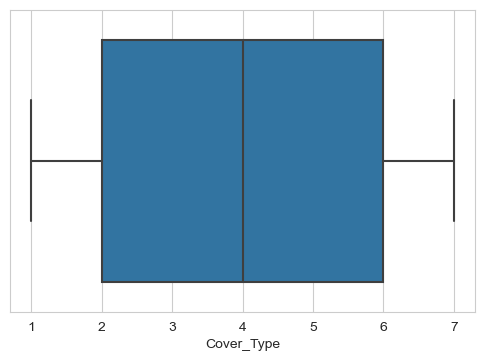

In [15]:
sns.boxplot(df.Cover_Type)

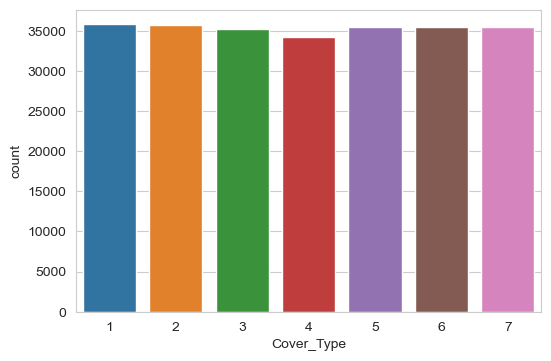

In [16]:
sns.countplot(df.Cover_Type);

<AxesSubplot:xlabel='Cover_Type', ylabel='Count'>

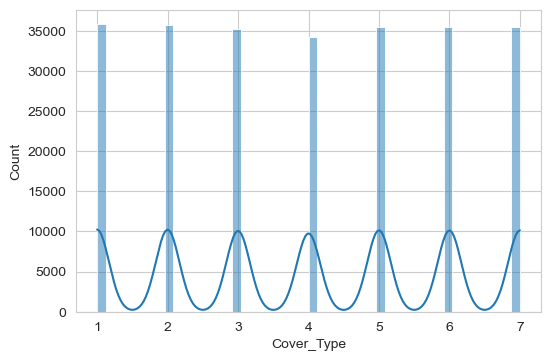

In [17]:
sns.histplot(df.Cover_Type, bins=50, kde=True)

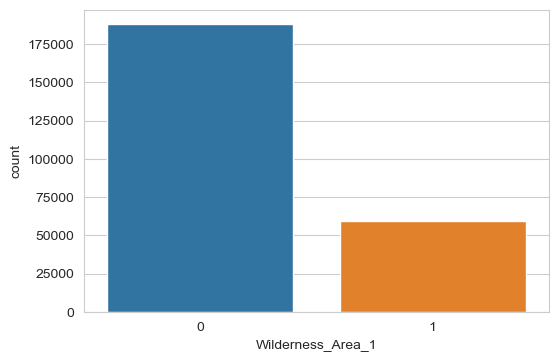

In [18]:
sns.countplot(df.Wilderness_Area_1);

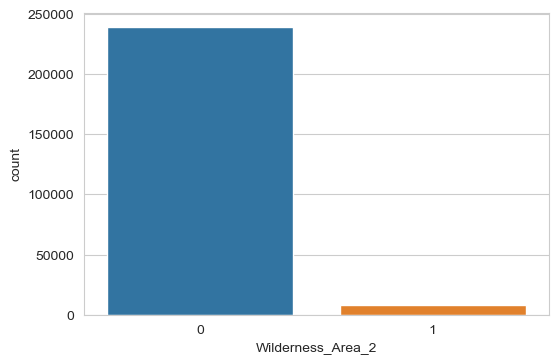

In [19]:
sns.countplot(df.Wilderness_Area_2);

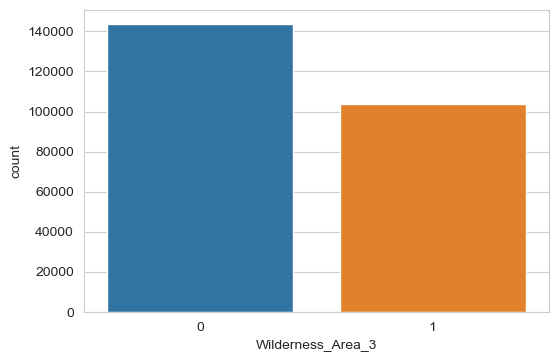

In [20]:
sns.countplot(df.Wilderness_Area_3);

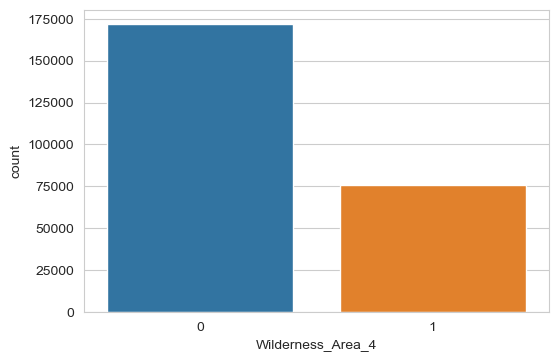

In [21]:
sns.countplot(df.Wilderness_Area_4);

In [22]:
soil_df = df.loc[:,'Soil_Type_1':'Soil_Type_40']
for c in soil_df.columns:
    print('{}: {}'.format(c, soil_df[c].value_counts()[1]))

Soil_Type_1: 4520
Soil_Type_2: 8872
Soil_Type_3: 14051
Soil_Type_4: 11595
Soil_Type_5: 2238
Soil_Type_6: 9173
Soil_Type_7: 15
Soil_Type_8: 23
Soil_Type_9: 153
Soil_Type_10: 31276
Soil_Type_11: 5845
Soil_Type_12: 3934
Soil_Type_13: 7933
Soil_Type_14: 1540
Soil_Type_15: 1
Soil_Type_16: 1144
Soil_Type_17: 7441
Soil_Type_18: 870
Soil_Type_19: 716
Soil_Type_20: 1890
Soil_Type_21: 157
Soil_Type_22: 5501
Soil_Type_23: 11844
Soil_Type_24: 3844
Soil_Type_25: 58
Soil_Type_26: 784
Soil_Type_27: 211
Soil_Type_28: 149
Soil_Type_29: 21102
Soil_Type_30: 11617
Soil_Type_31: 4978
Soil_Type_32: 10367
Soil_Type_33: 9930
Soil_Type_34: 373
Soil_Type_35: 1606
Soil_Type_36: 99
Soil_Type_37: 459
Soil_Type_38: 11446
Soil_Type_39: 10292
Soil_Type_40: 6698


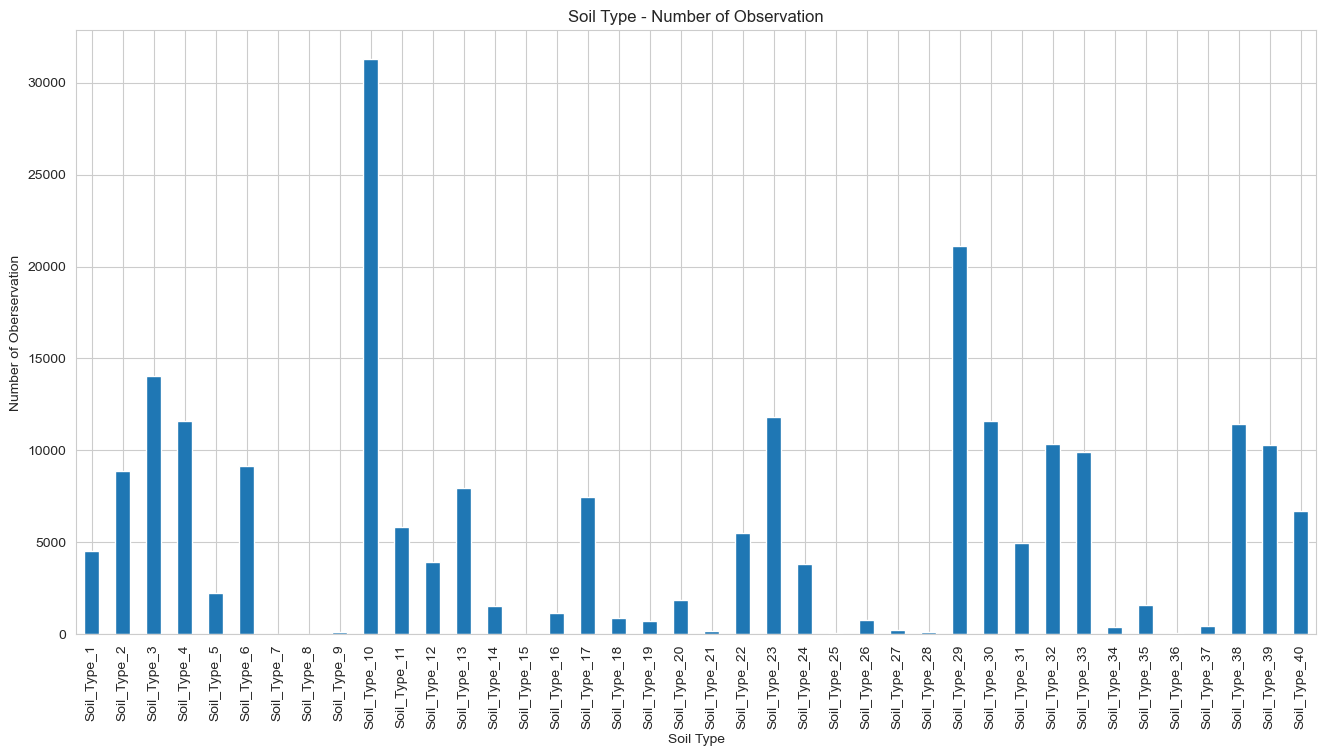

In [23]:
soil_df.sum().plot(kind='bar', figsize=(16, 8))
plt.title('Soil Type - Number of Observation')
plt.xlabel('Soil Type')
plt.ylabel('Number of Oberservation')
plt.xticks(rotation=90)
plt.show();

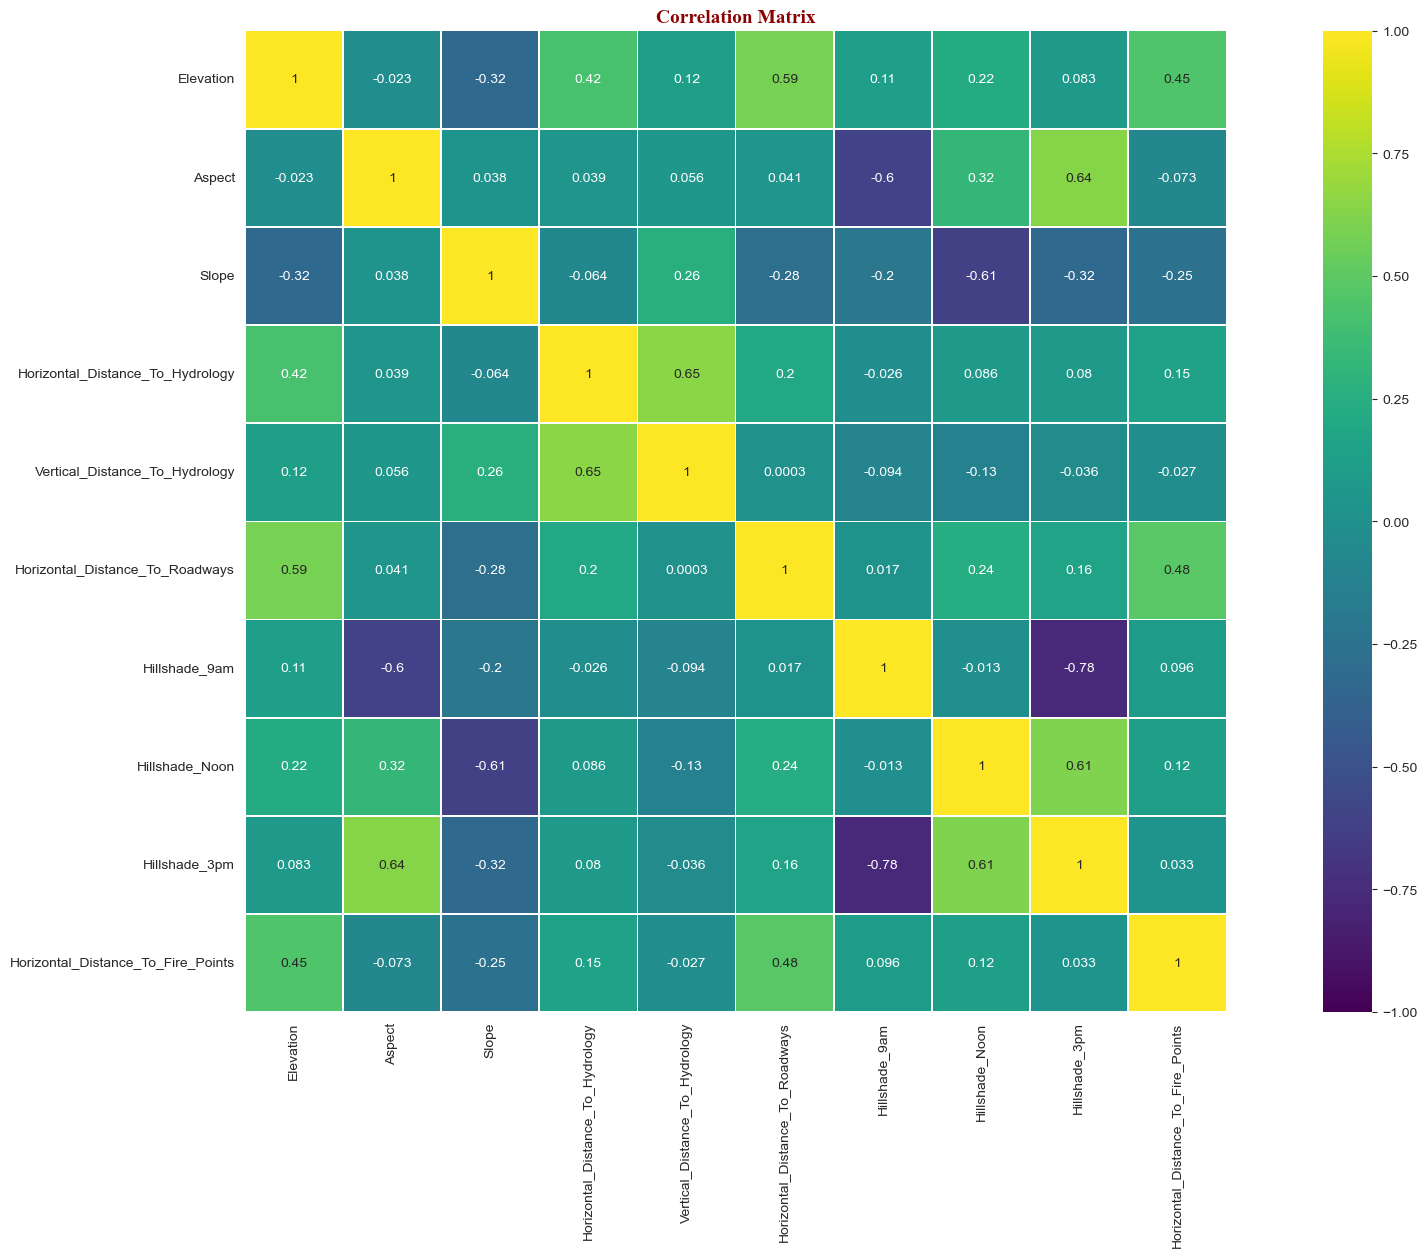

In [24]:
corr_matrix = df[df.columns[:10]].corr()

font_title = {'family': 'times new roman',
              'color': 'darkred',
              'weight': 'bold',
              'size': 14}

plt.figure(figsize=(25, 13))
sns.heatmap(corr_matrix, square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix", fontdict=font_title)
plt.show()

In [25]:
print(df.skew())

Elevation                              0.061
Aspect                                 0.453
Slope                                  0.547
Horizontal_Distance_To_Hydrology       1.472
Vertical_Distance_To_Hydrology         1.510
Horizontal_Distance_To_Roadways        1.227
Hillshade_9am                         -1.063
Hillshade_Noon                        -0.949
Hillshade_3pm                         -0.332
Horizontal_Distance_To_Fire_Points     1.630
Wilderness_Area_1                      1.220
Wilderness_Area_2                      5.176
Wilderness_Area_3                      0.326
Wilderness_Area_4                      0.845
Soil_Type_1                            7.195
Soil_Type_2                            4.993
Soil_Type_3                            3.831
Soil_Type_4                            4.289
Soil_Type_5                           10.373
Soil_Type_6                            4.901
Soil_Type_7                          128.436
Soil_Type_8                          103.716
Soil_Type_

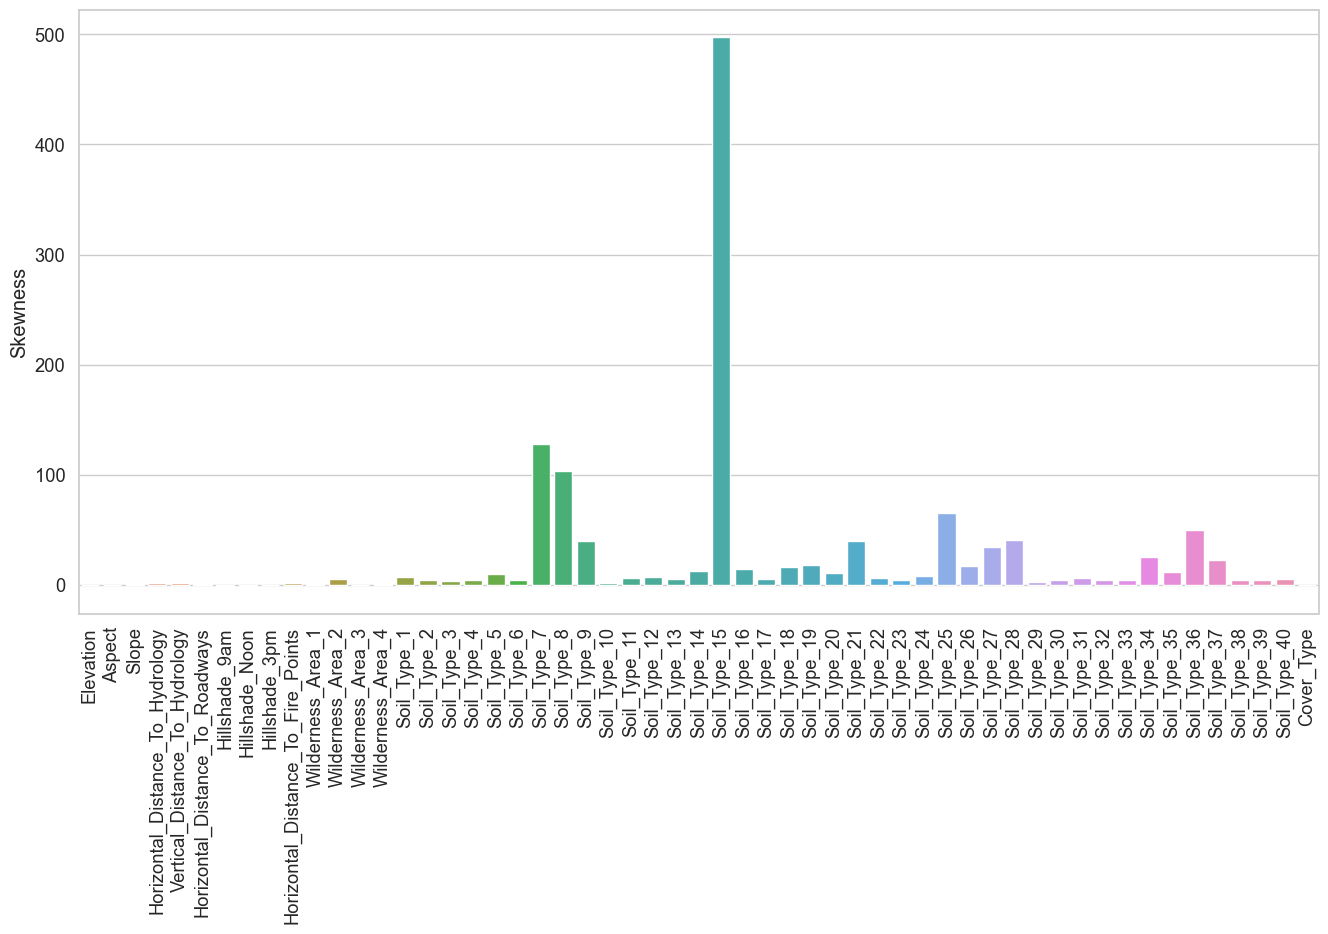

In [26]:
skew_df = pd.DataFrame(df.skew(), columns=['Skewness'])

sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(16, 8))
sns.barplot(data=skew_df, x=skew_df.index, y='Skewness')
plt.xticks(rotation=90)
plt.show();

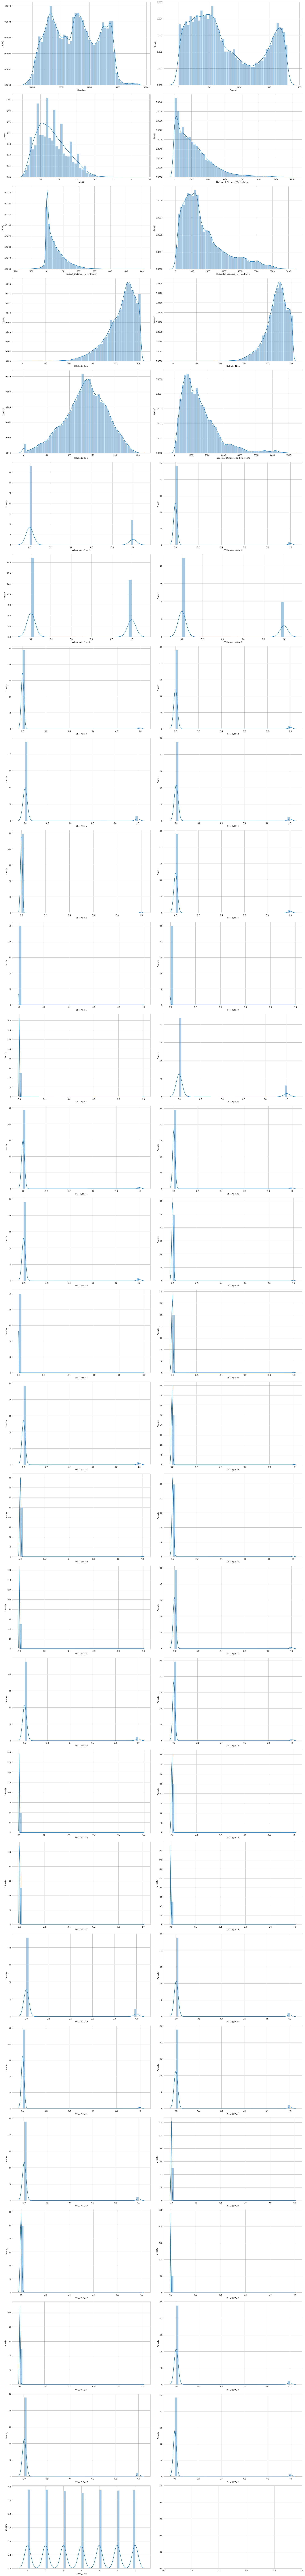

In [16]:
# pick number of columns
ncol = 2
# make sure enough subplots
nrow = math.floor((len(df.columns) + ncol - 1) / ncol)
# create the axes
height = 6 * nrow
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20, height))

# go over a linear list of data
for i, col in enumerate(df.columns):
    # compute an appropriate index (1d or 2d)
    ix = np.unravel_index(i, ax.shape) 

    sns.distplot(df[col], ax=ax[ix])

plt.tight_layout()
plt.show();

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [27]:
df.isnull().sum().any()

False

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.

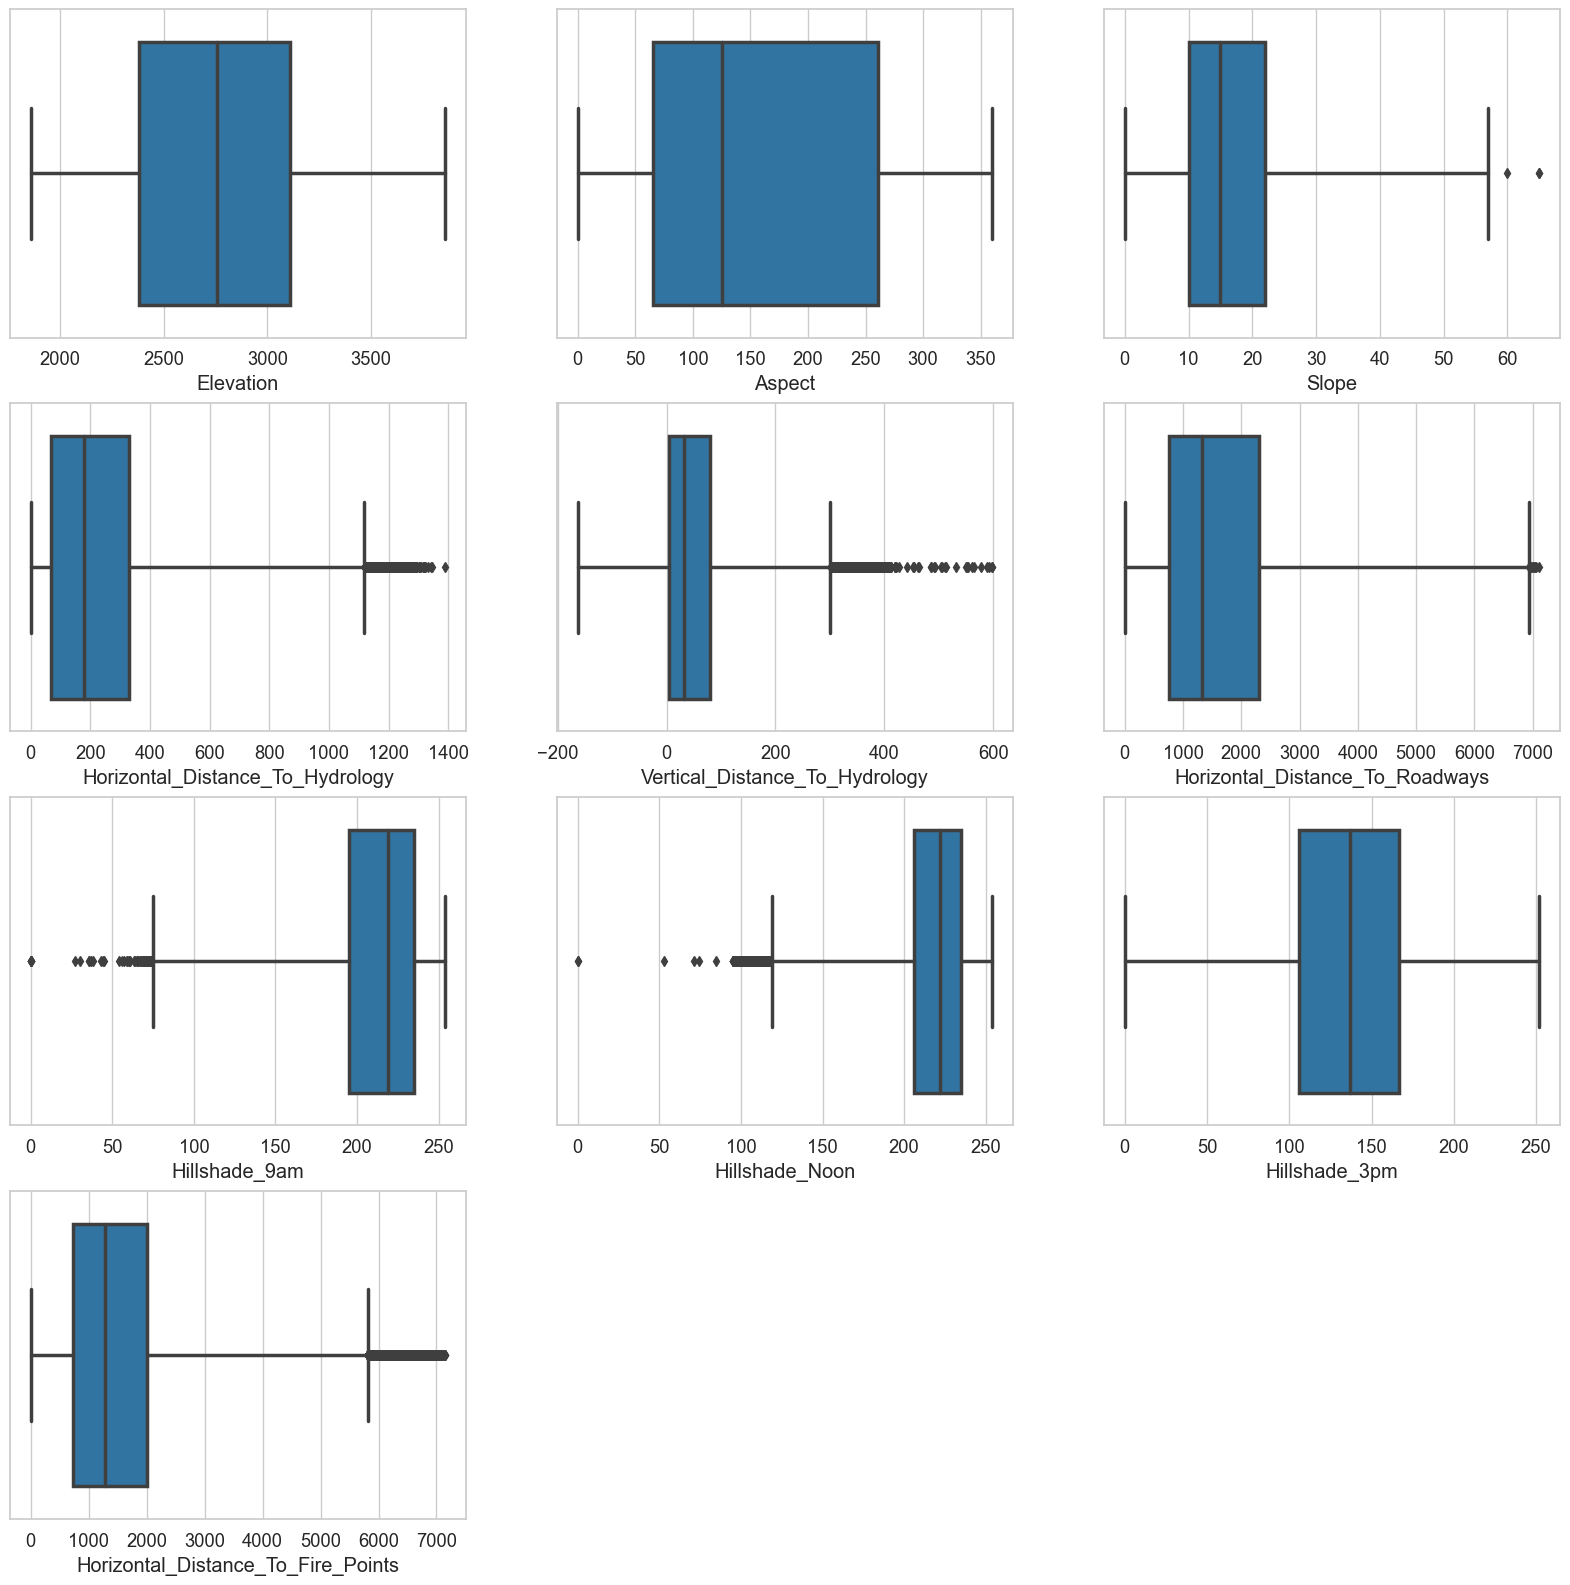

In [28]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns[:10]:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(x=feature, data=df, whis=3)

### Deal with Outliers

## Feature Engineering

In [30]:
df["Hypotenuse"] = ((df['Horizontal_Distance_To_Hydrology']*df['Horizontal_Distance_To_Hydrology']) + (df['Vertical_Distance_To_Hydrology']*df['Vertical_Distance_To_Hydrology']))

In [31]:
df["Hypotenuse"]=df["Hypotenuse"].map(lambda x: math.sqrt(x))

In [32]:
df["Hypotenuse"].head()

0   217.366
1   139.843
2   361.292
3   321.753
4   520.551
Name: Hypotenuse, dtype: float64

In [33]:
df = df.drop(columns=['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247479 entries, 0 to 249999
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           247479 non-null  int64  
 1   Aspect                              247479 non-null  int64  
 2   Slope                               247479 non-null  int64  
 3   Horizontal_Distance_To_Roadways     247479 non-null  int64  
 4   Hillshade_9am                       247479 non-null  int64  
 5   Hillshade_Noon                      247479 non-null  int64  
 6   Hillshade_3pm                       247479 non-null  int64  
 7   Horizontal_Distance_To_Fire_Points  247479 non-null  int64  
 8   Wilderness_Area_1                   247479 non-null  int64  
 9   Wilderness_Area_2                   247479 non-null  int64  
 10  Wilderness_Area_3                   247479 non-null  int64  
 11  Wilderness_Area_4         

In [35]:
# % 90 DAN FAZLA KORELASYON VAR MI?
df_numeric = df.select_dtypes(include ="number")
# TEK any(), HER BİR SÜTUN İÇİN T/F DÖNDÜRÜR, ÇİFT any().any() TÜM DF İÇİN TEK BİR T/F DÖNDÜRÜR.
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

In [36]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

False

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)
 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - KNN (Use ``KNeighborsClassifier`` model from ``sklearn.neighbors`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Data Preprocessing

In [106]:
X=df.drop(["Cover_Type"], axis=1)
y=df["Cover_Type"]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [108]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling and Model Performance

In [109]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, auc, roc_curve, average_precision_score, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [110]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision_macro" : precision_score(y_train, y_train_pred, average = "macro"),
                            "Recall_macro" : recall_score(y_train, y_train_pred, average = "macro"),                          
                            "f1_macro" : f1_score(y_train, y_train_pred, average = "macro")},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision_macro" : precision_score(y_test, y_pred, average = "macro"),
                           "Recall_macro" : recall_score(y_test, y_pred, average = "macro"),                          
                           "f1_macro" : f1_score(y_test, y_pred, average = "macro")}}
    
    return pd.DataFrame(scores)

In [111]:
def model_performance(y_train, y_train_pred, y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print("-------------------------------------------------------")
    print(classification_report(y_test, y_pred))
    print("-------------------------------------------------------")
    print(train_val(y_train, y_train_pred, y_test, y_pred))

In [112]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

In [113]:
def plot_multiclass_roc_for_svm(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

### SVM

In [114]:
from sklearn.svm import SVC, LinearSVC

In [115]:
svm_model = LinearSVC(class_weight = "balanced", random_state = 38)
svm_model.fit(X_train_scaled, y_train)
y_pred_proba=svm_model.decision_function(X_test_scaled)
y_pred=svm_model.predict(X_test_scaled)
y_train_pred=svm_model.predict(X_train_scaled)
model_performance(y_train, y_train_pred, y_test, y_pred)

[[4598 1090   10    0  470   63  936]
 [1750 3466  180    4 1386  316   54]
 [   0   22 3729  961  414 1929    0]
 [   0    0  381 6196    0  256    0]
 [ 237 1017  556    0 4910  383    0]
 [   0  279 1162  819  825 4001    0]
 [ 724    4   19    0   37    0 6312]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.63      0.64      0.64      7167
           2       0.59      0.48      0.53      7156
           3       0.62      0.53      0.57      7055
           4       0.78      0.91      0.84      6833
           5       0.61      0.69      0.65      7103
           6       0.58      0.56      0.57      7086
           7       0.86      0.89      0.88      7096

    accuracy                           0.67     49496
   macro avg       0.67      0.67      0.67     49496
weighted avg       0.67      0.67      0.67     49496

-------------------------------------------------------
                 train_s

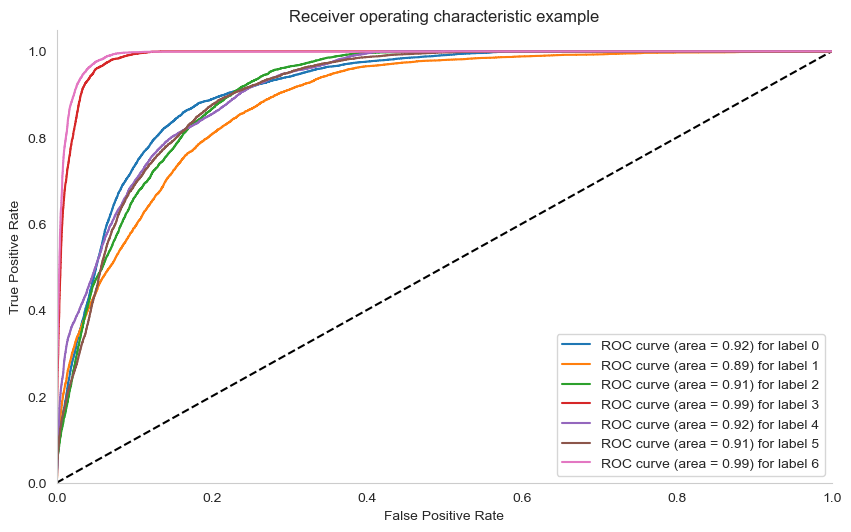

In [116]:
plot_multiclass_roc_for_svm(svm_model, X_test_scaled, y_test, n_classes=7, figsize=(10, 6))

In [117]:
svm_acc = accuracy_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred, average = "macro")
svm_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
svm_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
svm_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
#svm_auc = roc_auc_score(y_test, y_pred_proba, average = "macro", multi_class = "ovo")

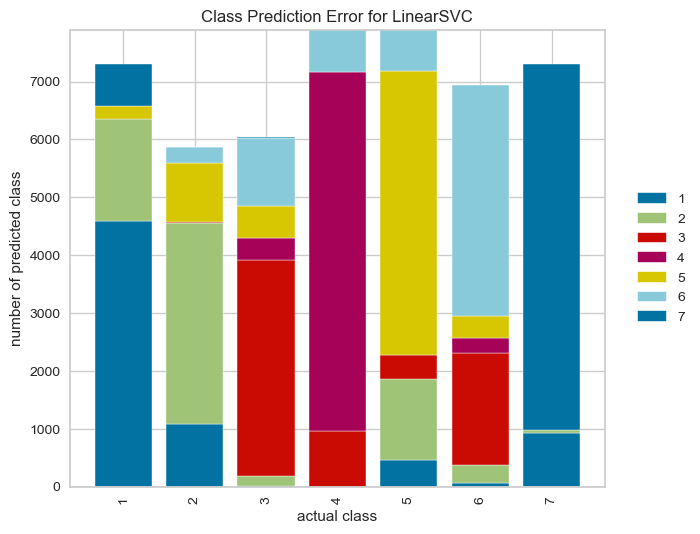

In [118]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(svm_model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show();

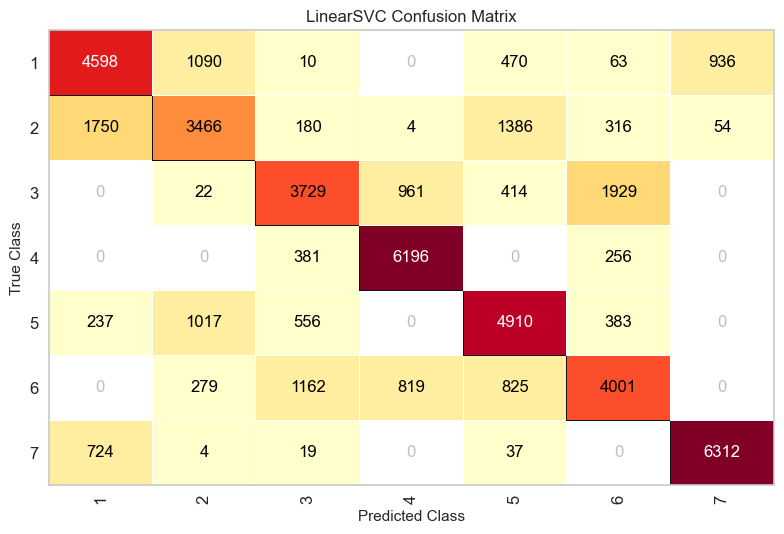

In [119]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(svm_model)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show();

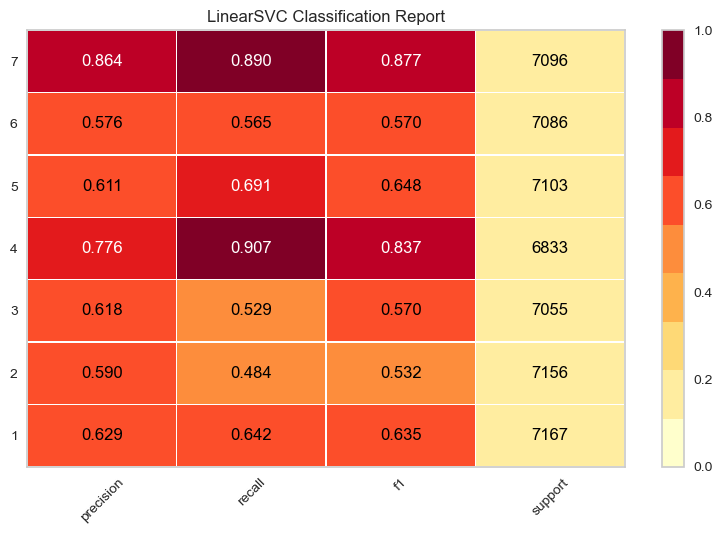

In [120]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(svm_model, support=True)
visualizer.fit(X_train_scaled, y_train)        
visualizer.score(X_test_scaled, y_test)        
visualizer.show();

- SVM has been widely used in finance. For example, predicting stock price via SVM has been a acknowledged application in the industry.
- In classification of text and handwritten objects, SVM performs well.
- It may not be very successful in datasets with more than 100,000 data.

## Decision Tree Classifier

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [140]:
DT_model = DecisionTreeClassifier(random_state=101)

In [141]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [142]:
y_pred = DT_model.predict(X_test)
y_pred_proba=DT_model.predict_proba(X_test)
y_train_pred = DT_model.predict(X_train)
model_performance(y_train, y_train_pred, y_test, y_pred)

[[6158  840    2    0   39    6  122]
 [ 896 5894   81    0  188   76   21]
 [   3   62 6618   65   19  288    0]
 [   0    0   25 6789    0   19    0]
 [  16   63   19    0 7001    4    0]
 [   3   53  223   33   11 6763    0]
 [  88   14    0    0    3    0 6991]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.86      0.86      0.86      7167
           2       0.85      0.82      0.84      7156
           3       0.95      0.94      0.94      7055
           4       0.99      0.99      0.99      6833
           5       0.96      0.99      0.97      7103
           6       0.95      0.95      0.95      7086
           7       0.98      0.99      0.98      7096

    accuracy                           0.93     49496
   macro avg       0.93      0.93      0.93     49496
weighted avg       0.93      0.93      0.93     49496

-------------------------------------------------------
                 train_s

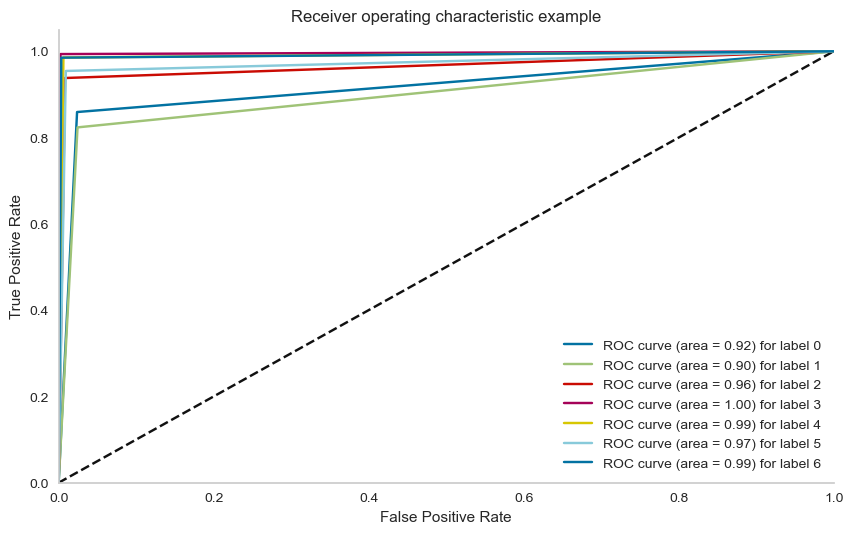

In [143]:
plot_multiclass_roc(DT_model, X_test, y_test, n_classes=7, figsize=(10, 6))

In [144]:
DT_acc = accuracy_score(y_test, y_pred)
DT_f1 = f1_score(y_test, y_pred, average = "macro")
DT_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
DT_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
DT_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
DT_auc = roc_auc_score(y_test, y_pred_proba, average = "macro", multi_class = "ovo")

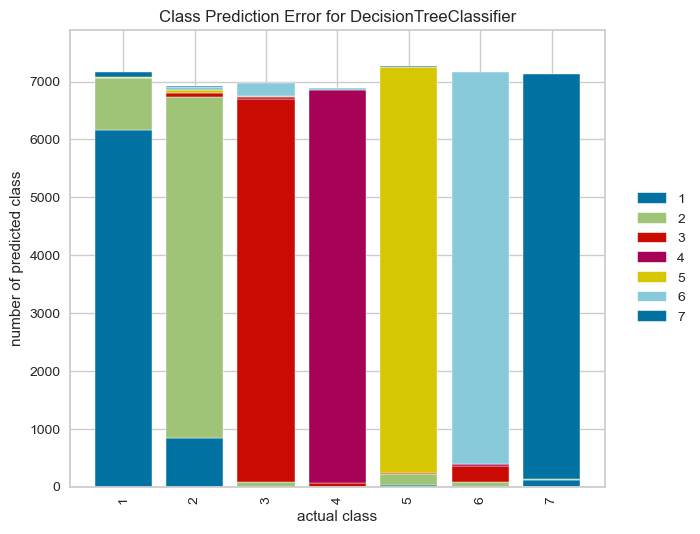

<AxesSubplot:title={'center':'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [145]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(DT_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

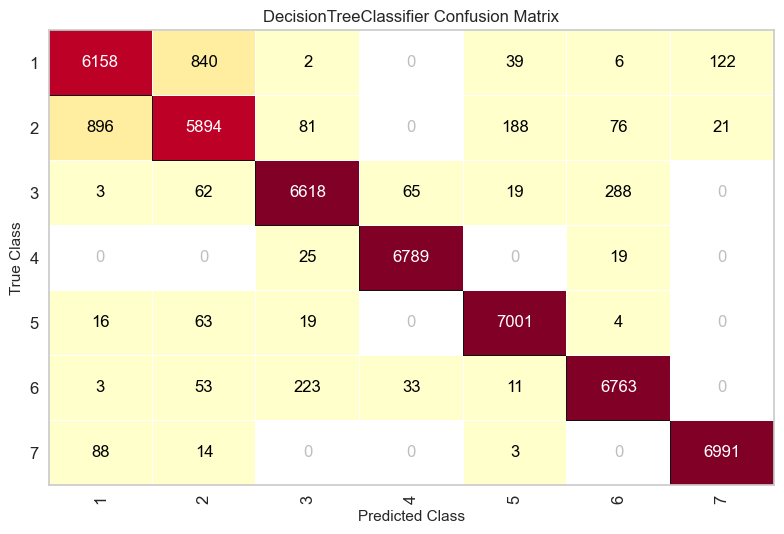

In [146]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(DT_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

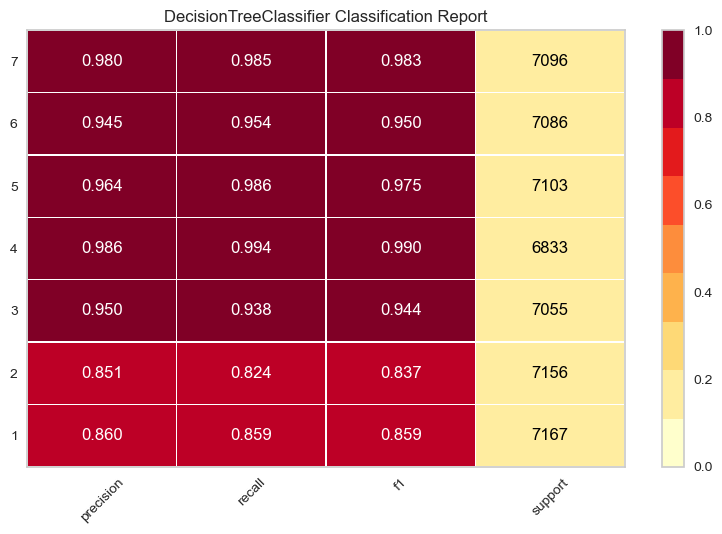

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [147]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(DT_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

### Cross Validate

In [150]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [151]:
model = DecisionTreeClassifier(max_depth=None, random_state=101) # default: max_depth=None

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.930
test_precision_macro   0.930
test_recall_macro      0.931
test_f1_macro          0.930
dtype: float64

In [ ]:
Feature Importances

In [152]:
DT_model.feature_importances_ 

array([4.14299793e-01, 3.09192857e-02, 2.12916774e-02, 1.09719974e-01,
       3.01396456e-02, 2.50253518e-02, 1.94578935e-02, 1.11470957e-01,
       1.35421524e-02, 1.45026725e-03, 8.35121563e-03, 9.91206451e-03,
       1.48751265e-03, 3.92777174e-03, 1.56131342e-02, 1.67726713e-02,
       1.01687651e-03, 2.47936563e-03, 0.00000000e+00, 1.97913148e-05,
       1.98949032e-05, 3.53462928e-02, 1.99004044e-03, 5.15883063e-03,
       2.21623386e-03, 3.24541386e-04, 0.00000000e+00, 5.44439785e-04,
       1.86476889e-03, 0.00000000e+00, 3.86893866e-04, 1.69790132e-03,
       1.04792748e-04, 2.96793422e-03, 3.13524484e-03, 1.75033132e-03,
       7.85729683e-06, 1.86977148e-04, 1.66012494e-04, 2.75243645e-04,
       5.89526296e-03, 1.82223486e-03, 3.11522538e-03, 4.77747999e-03,
       3.71398152e-03, 7.74334542e-05, 1.00639141e-03, 0.00000000e+00,
       0.00000000e+00, 3.42453833e-03, 5.48621536e-03, 6.76736082e-04,
       7.49628672e-02])

In [153]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
Soil_Type_15,0.000
Soil_Type_18,0.000
Soil_Type_36,0.000
Soil_Type_7,0.000
Soil_Type_37,0.000
Soil_Type_25,0.000
Soil_Type_8,0.000
Soil_Type_9,0.000
Soil_Type_34,0.000
Soil_Type_21,0.000


In [ ]:
Drop most important feature

In [154]:
X2 = X.drop(columns = ["Elevation"]) 

In [155]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=101)

In [157]:
DT2_model = DecisionTreeClassifier(max_depth=None,random_state=101)
DT2_model.fit(X_train2, y_train2) 

DecisionTreeClassifier(random_state=101)

In [158]:
y_pred2 = DT2_model.predict(X_test2)
print(confusion_matrix(y_test2, y_pred2))

[[ 8645  1678    34     0   111    54   263]
 [ 1729  8244   180     3   260   192    85]
 [   26   152  9617   153    65   574     9]
 [    0     1    95 10150     0    73     0]
 [   75   139    47     0 10469    28     6]
 [   38   125   523    76    30  9727    12]
 [  149    69    12     0     8     1 10317]]


In [159]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           1       0.81      0.80      0.81     10785
           2       0.79      0.77      0.78     10693
           3       0.92      0.91      0.91     10596
           4       0.98      0.98      0.98     10319
           5       0.96      0.97      0.96     10764
           6       0.91      0.92      0.92     10531
           7       0.96      0.98      0.97     10556

    accuracy                           0.90     74244
   macro avg       0.90      0.91      0.90     74244
weighted avg       0.90      0.90      0.90     74244



In [160]:
DT2_model.feature_importances_
df_f_i = pd.DataFrame(index=X2.columns, data = DT2_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
Soil_Type_15,0.000
Soil_Type_8,0.000
Soil_Type_7,0.000
Soil_Type_25,0.000
Soil_Type_27,0.000
Soil_Type_9,0.000
Soil_Type_28,0.000
Soil_Type_14,0.000
Soil_Type_18,0.000
Soil_Type_36,0.000


### Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=38)
rf_model.fit(X_train, y_train)
y_pred_proba=rf_model.predict_proba(X_test)
y_pred=rf_model.predict(X_test)
y_train_pred=rf_model.predict(X_train)
model_performance(y_train, y_train_pred, y_test, y_pred)

[[6413  605    3    0   36    7  103]
 [ 556 6299   70    0  150   71   10]
 [   0    8 6802   49    8  188    0]
 [   0    0    7 6822    0    4    0]
 [   0   12    6    0 7082    3    0]
 [   0    4   79   33    2 6968    0]
 [  31    2    0    0    3    0 7060]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.92      0.89      0.91      7167
           2       0.91      0.88      0.89      7156
           3       0.98      0.96      0.97      7055
           4       0.99      1.00      0.99      6833
           5       0.97      1.00      0.98      7103
           6       0.96      0.98      0.97      7086
           7       0.98      0.99      0.99      7096

    accuracy                           0.96     49496
   macro avg       0.96      0.96      0.96     49496
weighted avg       0.96      0.96      0.96     49496

-------------------------------------------------------
                 train_s

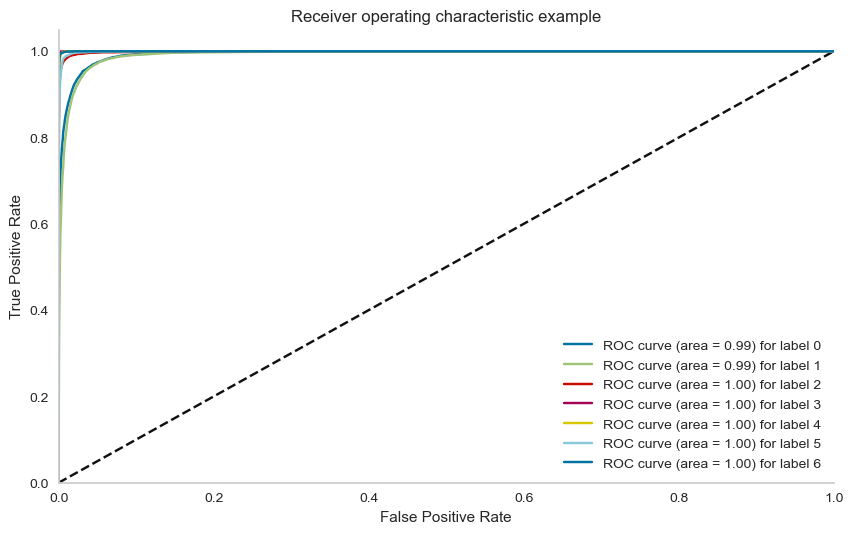

In [127]:
plot_multiclass_roc(rf_model, X_test, y_test, n_classes=7, figsize=(10, 6))

In [128]:
rf_acc = accuracy_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred, average = "macro")
rf_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
rf_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
rf_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
rf_auc = roc_auc_score(y_test, y_pred_proba, average = "macro", multi_class = "ovo")

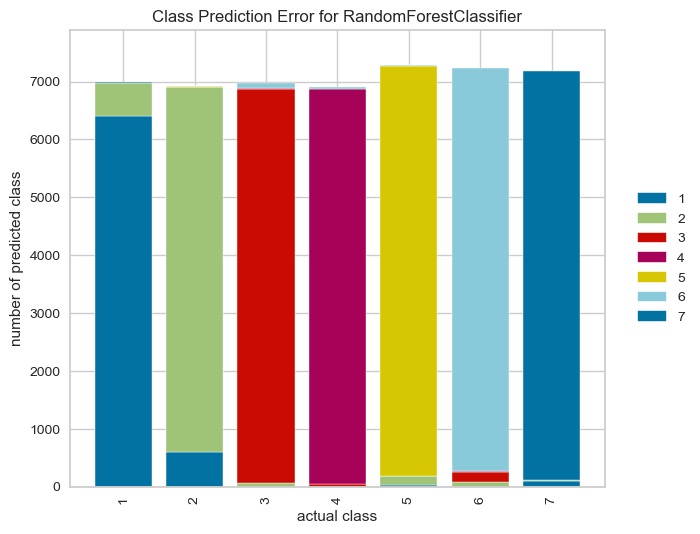

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [129]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(rf_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

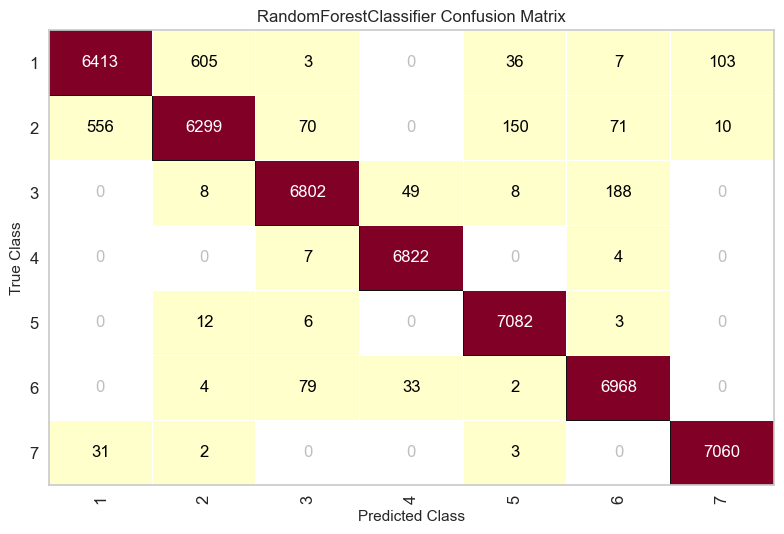

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [130]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rf_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

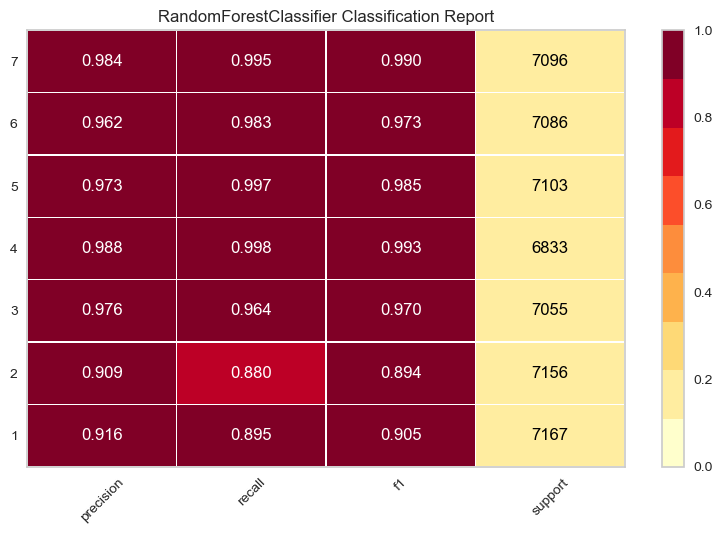

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [131]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rf_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

### XGBoost

In [132]:
from xgboost import XGBClassifier

In [133]:
xgb_model = XGBClassifier(random_state=38)
xgb_model.fit(X_train, y_train)
y_pred_proba=xgb_model.predict_proba(X_test)
y_pred=xgb_model.predict(X_test)
y_train_pred=xgb_model.predict(X_train)
model_performance(y_train, y_train_pred, y_test, y_pred)

[14:58:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[6016  863    2    0   81   11  194]
 [1005 5612   83    0  338  101   17]
 [   0   13 6342   79   38  583    0]
 [   0    0    7 6816    0   10    0]
 [   3   54   36    0 6983   27    0]
 [   2   21  221   40   27 6775    0]
 [  48    0    0    0    4    0 7044]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.85      0.84      0.84      7167
           2       0.86      0.78      0.82      7156
           3       0.95      0.90      0.92      7055
           4       0.98      1.00      0.99      6833
           5       0.93      0.98      0.96      7103
           6       0.90      0.96      0.

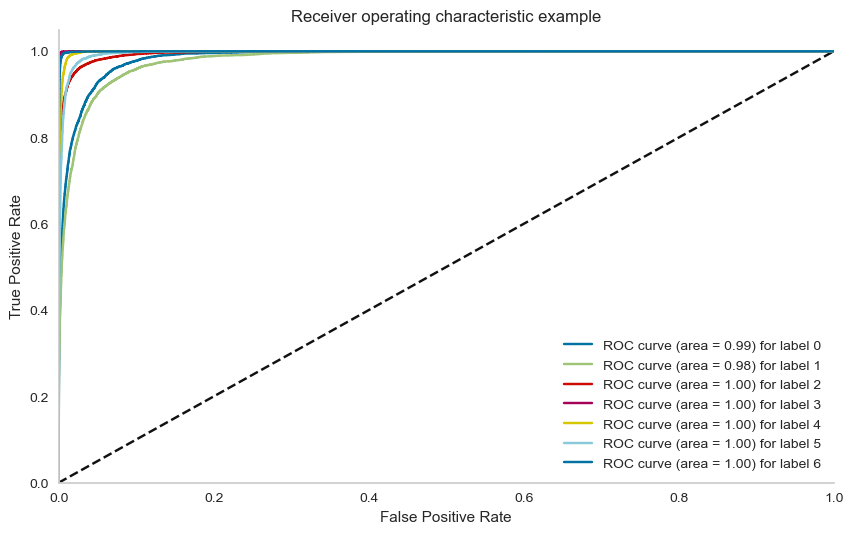

In [134]:
plot_multiclass_roc(xgb_model, X_test, y_test, n_classes=7, figsize=(10, 6))

In [135]:
xgb_acc = accuracy_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred, average = "macro")
xgb_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
xgb_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
xgb_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
xgb_auc = roc_auc_score(y_test, y_pred_proba, average = "macro", multi_class = "ovo")

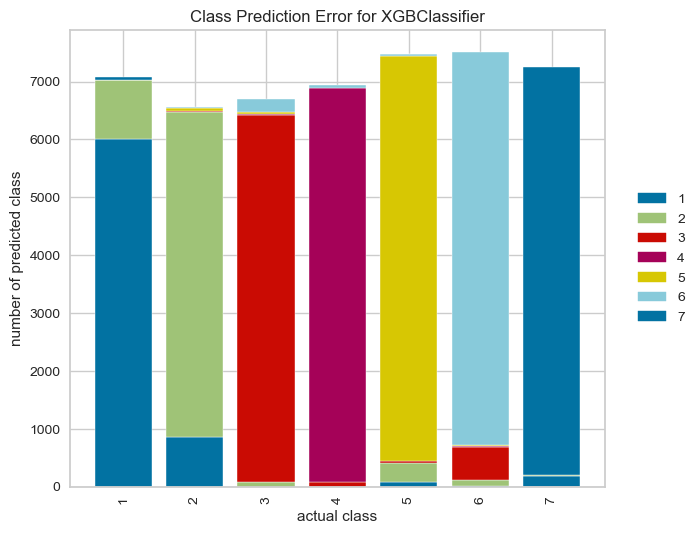

<AxesSubplot:title={'center':'Class Prediction Error for XGBClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [136]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(xgb_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

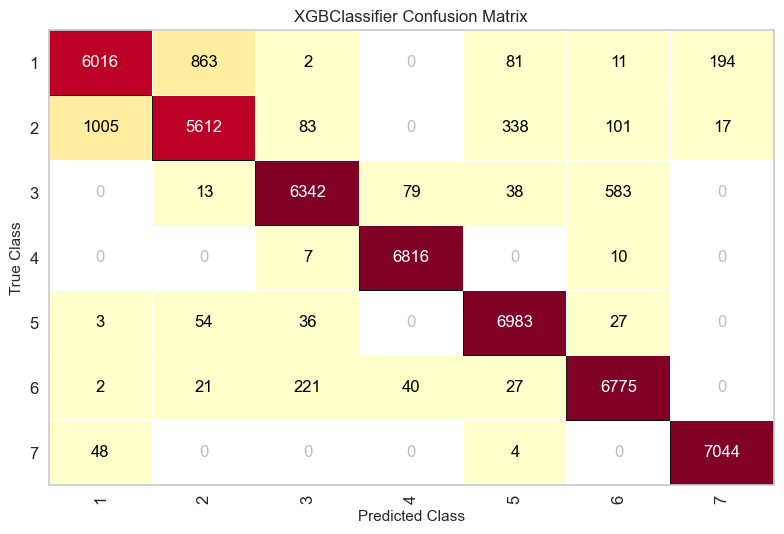

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [137]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(xgb_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

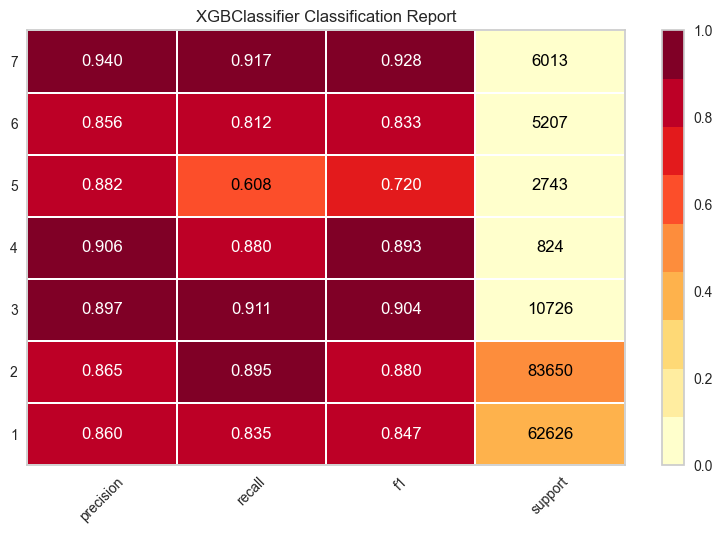

<AxesSubplot:title={'center':'XGBClassifier Classification Report'}>

In [101]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(xgb_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

### Comparing

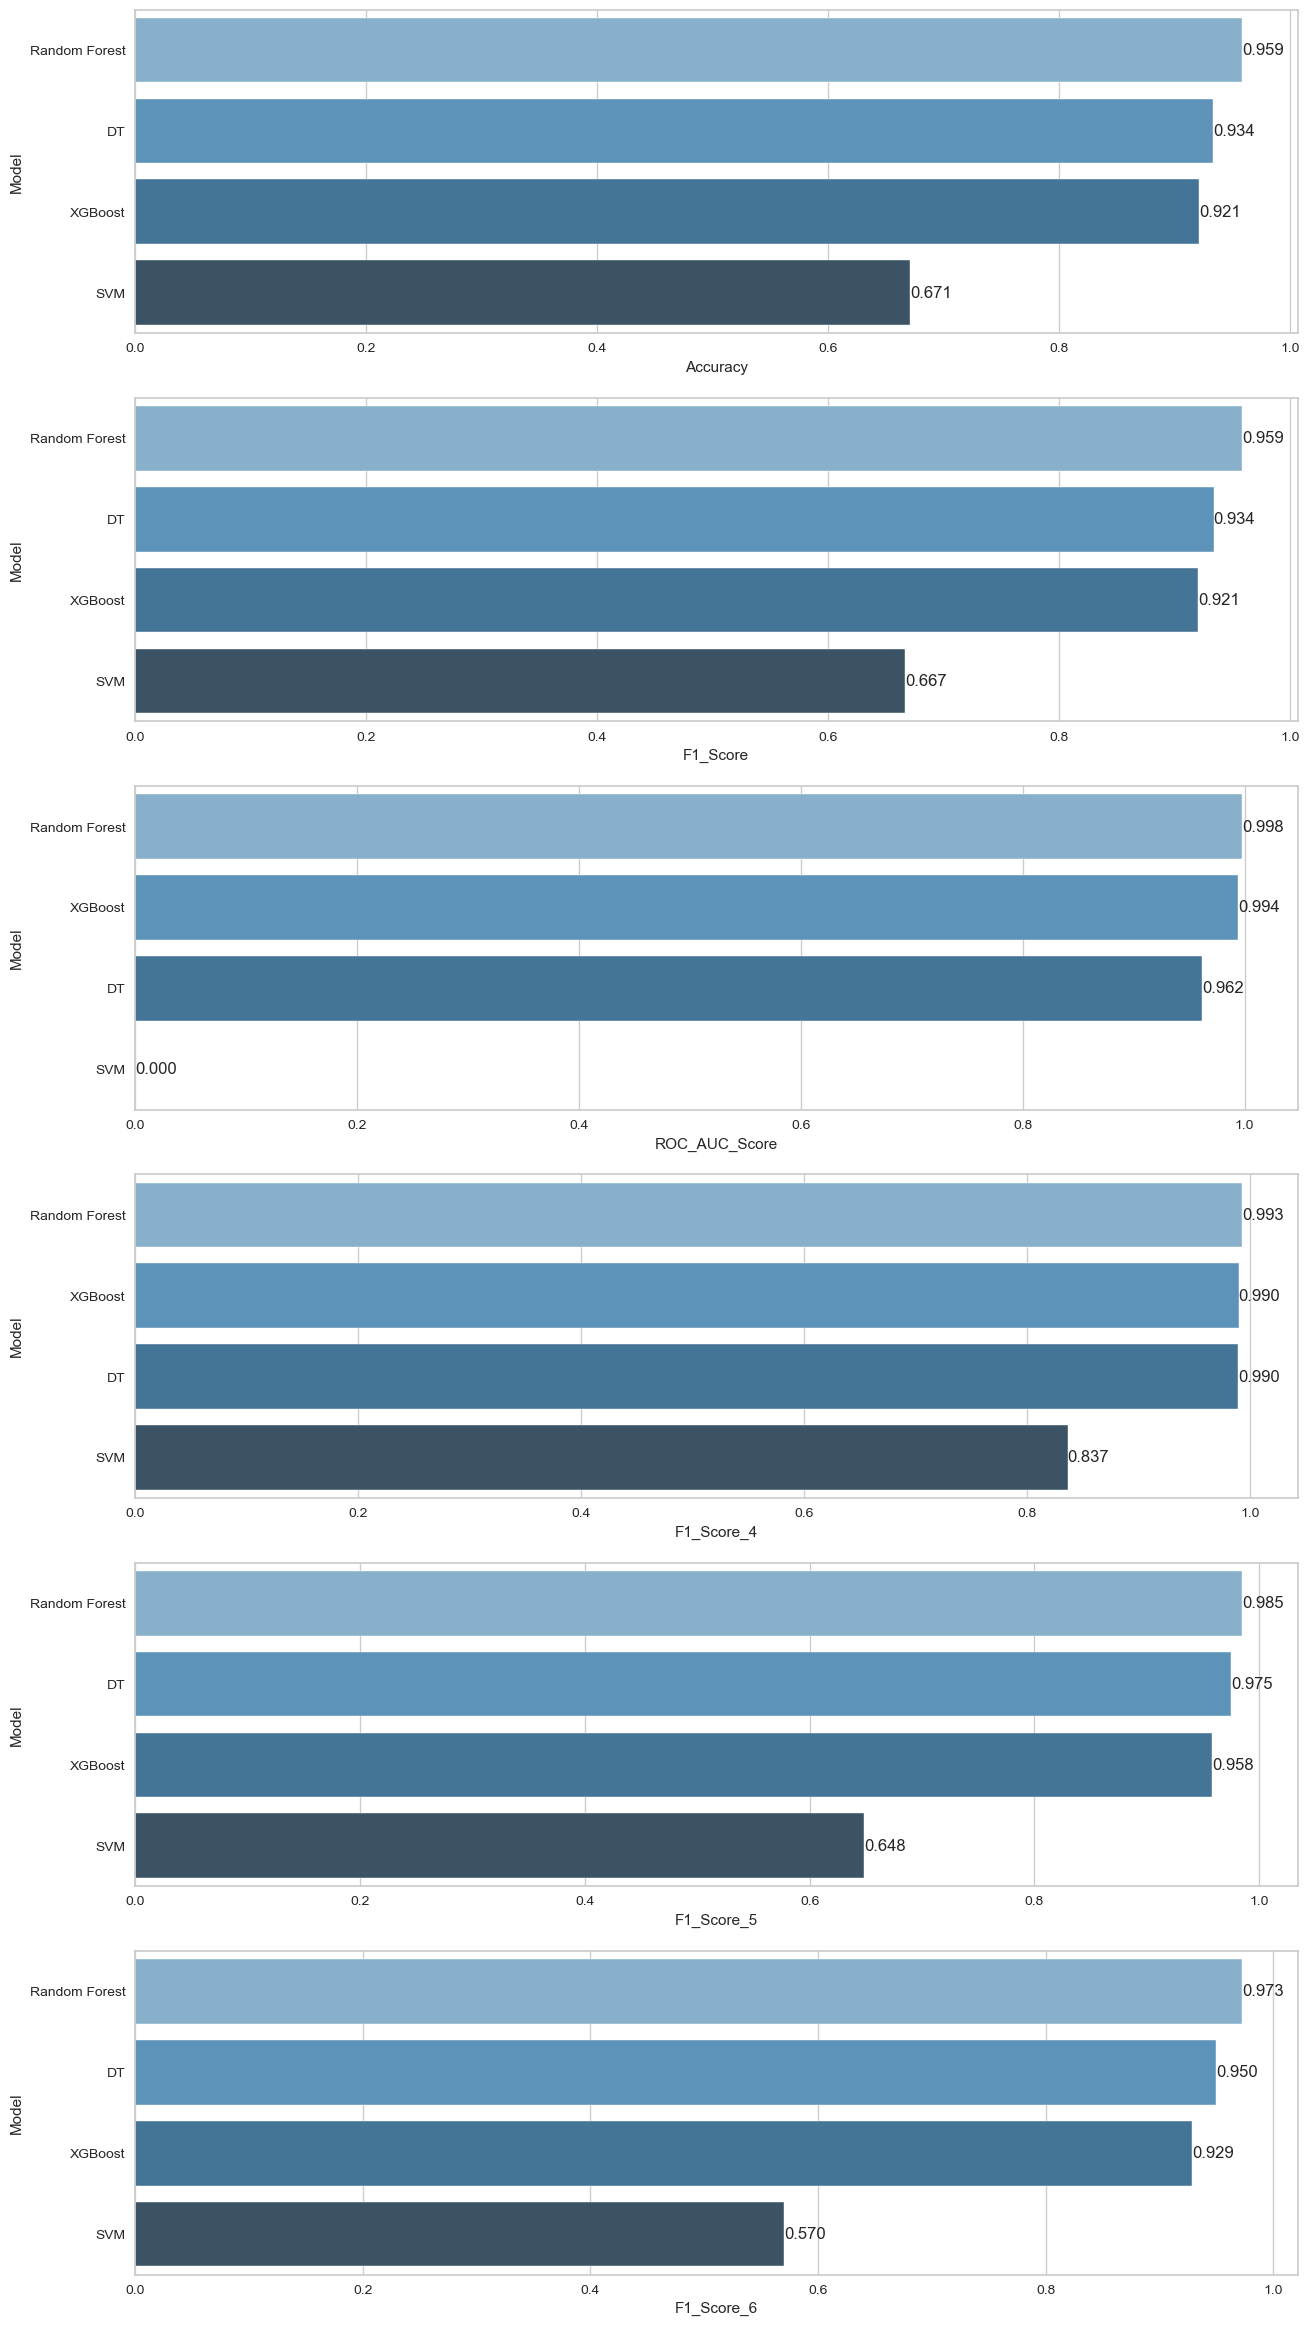

In [161]:
compare = pd.DataFrame({"Model": ["SVM", "DT", "Random Forest", "XGBoost"],
                        "Accuracy": [svm_acc, DT_acc, rf_acc, xgb_acc],
                        "F1_Score": [svm_f1, DT_f1, rf_f1, xgb_f1],
                        "F1_Score_4": [svm_f1_4, DT_f1_4, rf_f1_4, xgb_f1_4],
                        "F1_Score_5": [svm_f1_5, DT_f1_5, rf_f1_5, xgb_f1_5],
                        "F1_Score_6": [svm_f1_6, DT_f1_6, rf_f1_6, xgb_f1_6],
                        "ROC_AUC_Score": [0, DT_auc, rf_auc, xgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(611)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(612)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(613)
compare = compare.sort_values(by="ROC_AUC_Score", ascending=False)
ax=sns.barplot(x="ROC_AUC_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(614)
compare = compare.sort_values(by="F1_Score_4", ascending=False)
ax=sns.barplot(x="F1_Score_4", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(615)
compare = compare.sort_values(by="F1_Score_5", ascending=False)
ax=sns.barplot(x="F1_Score_5", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(616)
compare = compare.sort_values(by="F1_Score_6", ascending=False)
ax=sns.barplot(x="F1_Score_6", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()